In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

## **Displaying the data**

In [ ]:
import pandas as pd

# Provide the URL of the file
url = '/content/drive/MyDrive/Imp/Levine_32dim.fcs.csv'

# Load the dataset
df = pd.read_csv(url)

# Check the first few rows of the dataset
print(df.head())


   Event    Time  Cell_length      DNA1      DNA2    CD45RA     CD133  \
0      1  2693.0           22  4.391057  4.617262  0.162691 -0.029585   
1      2  3736.0           35  4.340481  4.816692  0.701349 -0.038280   
2      3  7015.0           32  3.838727  4.386369  0.603568 -0.032216   
3      4  7099.0           29  4.255806  4.830048  0.433747 -0.027611   
4      5  7700.0           25  3.976909  4.506433 -0.008809 -0.030297   

       CD19      CD22     CD11b  ...     CD117     CD49d    HLA-DR      CD64  \
0 -0.006696  0.066388 -0.009184  ...  0.053050  0.853505  1.664480 -0.005376   
1 -0.016654  0.074409  0.808031  ...  0.089660  0.197818  0.491592  0.144814   
2  0.073855 -0.042977 -0.001881  ...  0.046222  2.586670  1.308337 -0.010961   
3 -0.017661 -0.044072  0.733698  ...  0.066470  1.338669  0.140523 -0.013449   
4  0.080423  0.495791  1.107627  ... -0.006223  0.180924  0.197332  0.076167   

       CD41  Viability  file_number  event_number  label  individual  
0 -0.0019

In [ ]:
df

Event       Time  Cell_length      DNA1      DNA2    CD45RA  \
0            1    2693.00           22  4.391057  4.617262  0.162691   
1            2    3736.00           35  4.340481  4.816692  0.701349   
2            3    7015.00           32  3.838727  4.386369  0.603568   
3            4    7099.00           29  4.255806  4.830048  0.433747   
4            5    7700.00           25  3.976909  4.506433 -0.008809   
...        ...        ...          ...       ...       ...       ...   
265622  265623  707951.44           41  6.826629  7.133022  1.474081   
265623  265624  708145.44           45  6.787791  7.154026  0.116755   
265624  265625  708398.44           41  6.889866  7.141219  0.684921   
265625  265626  708585.44           39  6.865218  7.144353  0.288761   
265626  265627  709122.44           41  6.887820  7.127359  0.360753   

           CD133      CD19      CD22     CD11b  ...     CD117     CD49d  \
0      -0.029585 -0.006696  0.066388 -0.009184  ...  0.053050  0.853505   
1      -0.038280 -0.016654  0.074409  0.808031  ...  0.089660  0.197818   
2      -0.032216  0.073855 -0.042977 -0.001881  ...  0.046222  2.586670   
3      -0.027611 -0.017661 -0.044072  0.733698  ...  0.066470  1.338669   
4      -0.030297  0.080423  0.495791  1.107627  ... -0.006223  0.180924   
...          ...       ...       ...       ...  ...       ...       ...   
265622 -0.019174 -0.055620 -0.007261  0.063395  ... -0.011105  0.533736   
265623 -0.056213 -0.008864 -0.035158 -0.041845  ...  0.143869  1.269464   
265624 -0.006264 -0.026111 -0.030837 -0.034641  ...  0.087102 -0.055912   
265625 -0.011310 -0.048786  0.073983 -0.031787  ... -0.047971  0.101955   
265626  0.128604 -0.006934  0.109846  3.864711  ...  0.080195  0.037962   

          HLA-DR      CD64      CD41  Viability  file_number  event_number  \
0       1.664480 -0.005376 -0.001961   0.648429     3.627711           307   
1       0.491592  0.144814  0.868014   0.561384     3.627711           545   
2       1.308337 -0.010961 -0.010413   0.643337     3.627711          1726   
3       0.140523 -0.013449 -0.026039  -0.026523     3.627711          1766   
4       0.197332  0.076167 -0.040488   0.283287     3.627711          2031   
...          ...       ...       ...        ...          ...           ...   
265622  0.123758 -0.042495 -0.027971   0.236957     3.669327        102686   
265623  0.047215 -0.008000 -0.025811  -0.003500     3.669327        102690   
265624  0.501536  0.053884 -0.042602   0.107206     3.669327        102701   
265625  6.200001  0.296877  0.192786   0.620872     3.669327        102706   
265626  3.675123 -0.000878 -0.052526   0.310466     3.669327        102720   

        label  individual  
0         1.0           1  
1         1.0           1  
2         1.0           1  
3         1.0           1  
4         1.0           1  
...       ...         ...  
265622    NaN           2  
265623    NaN           2  
265624    NaN           2  
265625    NaN           2  
265626    NaN           2  

[265627 rows x 42 columns]

In [ ]:
df.columns

Index(['Event', 'Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133',
       'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4',
       'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c',
       'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117',
       'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number',
       'event_number', 'label', 'individual'],
      dtype='object')

In [ ]:
df['Viability']

0         0.648429
1         0.561384
2         0.643337
3        -0.026523
4         0.283287
            ...   
265622    0.236957
265623   -0.003500
265624    0.107206
265625    0.620872
265626    0.310466
Name: Viability, Length: 265627, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265627 entries, 0 to 265626
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Event         265627 non-null  int64  
 1   Time          265627 non-null  float64
 2   Cell_length   265627 non-null  int64  
 3   DNA1          265627 non-null  float64
 4   DNA2          265627 non-null  float64
 5   CD45RA        265627 non-null  float64
 6   CD133         265627 non-null  float64
 7   CD19          265627 non-null  float64
 8   CD22          265627 non-null  float64
 9   CD11b         265627 non-null  float64
 10  CD4           265627 non-null  float64
 11  CD8           265627 non-null  float64
 12  CD34          265627 non-null  float64
 13  Flt3          265627 non-null  float64
 14  CD20          265627 non-null  float64
 15  CXCR4         265627 non-null  float64
 16  CD235ab       265627 non-null  float64
 17  CD45          265627 non-null  float64
 18  CD12

In [ ]:
df.describe()

Event           Time    Cell_length           DNA1  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean   132814.000000  272948.345014      34.450572       4.606956   
std     76680.054314  171220.139430      11.446694       1.312831   
min         1.000000       1.000000      10.000000       2.786488   
25%     66407.500000  120196.000000      26.000000       3.700023   
50%    132814.000000  253276.000000      33.000000       4.022127   
75%    199220.500000  424502.500000      41.000000       6.353313   
max    265627.000000  709122.440000      65.000000       7.001489   

                DNA2         CD45RA          CD133           CD19  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        5.198308       0.688127       0.145960       0.509301   
std         1.150357       0.609105       0.259267       0.857462   
min         2.236450      -0.057305      -0.058081      -0.058089   
25%         4.407822       0.204625      -0.022935      -0.018838   
50%         4.698415       0.549387       0.025353       0.075210   
75%         6.766268       1.031198       0.224299       0.548386   
max         7.472308       6.691197       5.527494       4.990085   

                CD22          CD11b  ...          CD117          CD49d  \
count  265627.000000  265627.000000  ...  265627.000000  265627.000000   
mean        0.397323       0.710319  ...       0.131199       0.794938   
std         0.762126       1.011434  ...       0.313208       0.627619   
min        -0.057342      -0.058236  ...      -0.057668      -0.058064   
25%        -0.020689      -0.000294  ...      -0.023957       0.283013   
50%         0.058790       0.257923  ...      -0.000410       0.677212   
75%         0.386481       0.923517  ...       0.154736       1.190787   
max         5.160477       5.260789  ...       5.502125       5.153438   

              HLA-DR           CD64           CD41      Viability  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        1.521812       0.551512       0.261754       0.570037   
std         1.694211       0.888739       0.617065       0.589738   
min        -0.057974      -0.058199      -0.058244      -0.057979   
25%         0.057709      -0.010582      -0.020166       0.065523   
50%         0.611335       0.122493       0.052229       0.398230   
75%         2.888240       0.604131       0.305591       0.931058   
max         7.052507       4.517843       7.718288       2.433031   

         file_number   event_number          label     individual  
count  265627.000000  265627.000000  104184.000000  265627.000000  
mean        3.639348  171288.314234       8.116102       1.279625  
std         0.018678  123904.361456       2.457486       0.448816  
min         3.627711       1.000000       1.000000       1.000000  
25%         3.627711   58679.500000       7.000000       1.000000  
50%         3.627711  152783.000000       8.000000       1.000000  
75%         3.669327  282369.000000      10.000000       2.000000  
max         3.669327  400112.000000      14.000000       2.000000  

[8 rows x 42 columns]

### **Finding the column containg null values**

In [ ]:
null_count = df.isnull().sum()
print(null_count)

Event                0
Time                 0
Cell_length          0
DNA1                 0
DNA2                 0
CD45RA               0
CD133                0
CD19                 0
CD22                 0
CD11b                0
CD4                  0
CD8                  0
CD34                 0
Flt3                 0
CD20                 0
CXCR4                0
CD235ab              0
CD45                 0
CD123                0
CD321                0
CD14                 0
CD33                 0
CD47                 0
CD11c                0
CD7                  0
CD15                 0
CD16                 0
CD44                 0
CD38                 0
CD13                 0
CD3                  0
CD61                 0
CD117                0
CD49d                0
HLA-DR               0
CD64                 0
CD41                 0
Viability            0
file_number          0
event_number         0
label           161443
individual           0
dtype: int64


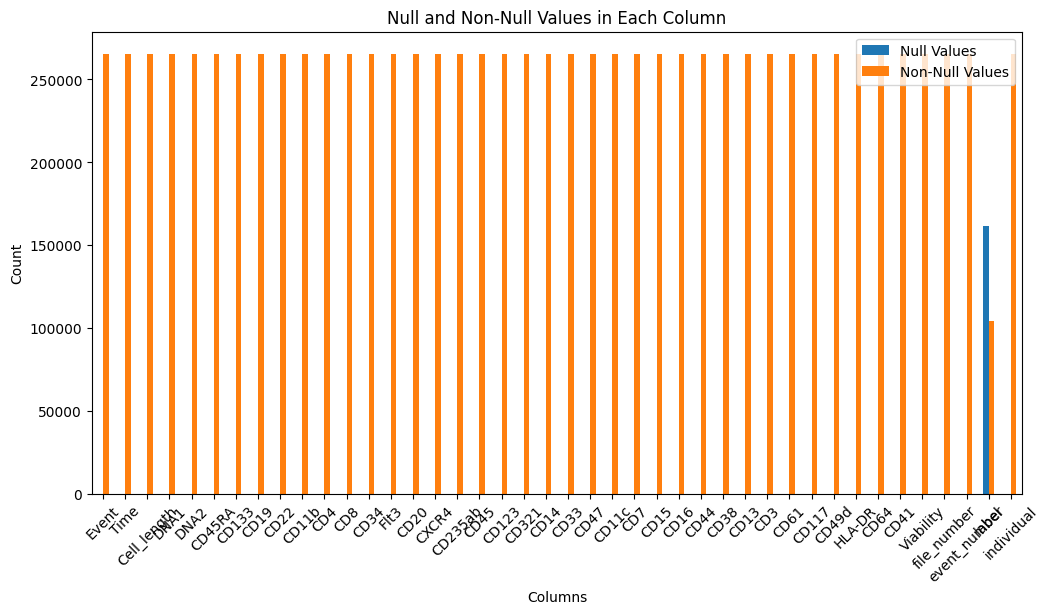

In [ ]:
df = pd.DataFrame(df)
null_values = df.isnull().sum()
non_null_values = df.notnull().sum()
plot_data = pd.DataFrame({
    'Null Values': null_values,
    'Non-Null Values': non_null_values
})
plot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Null and Non-Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [ ]:
df = df.drop(columns=['Event','Time','individual','file_number','event_number',])

### **Correlation matrix**

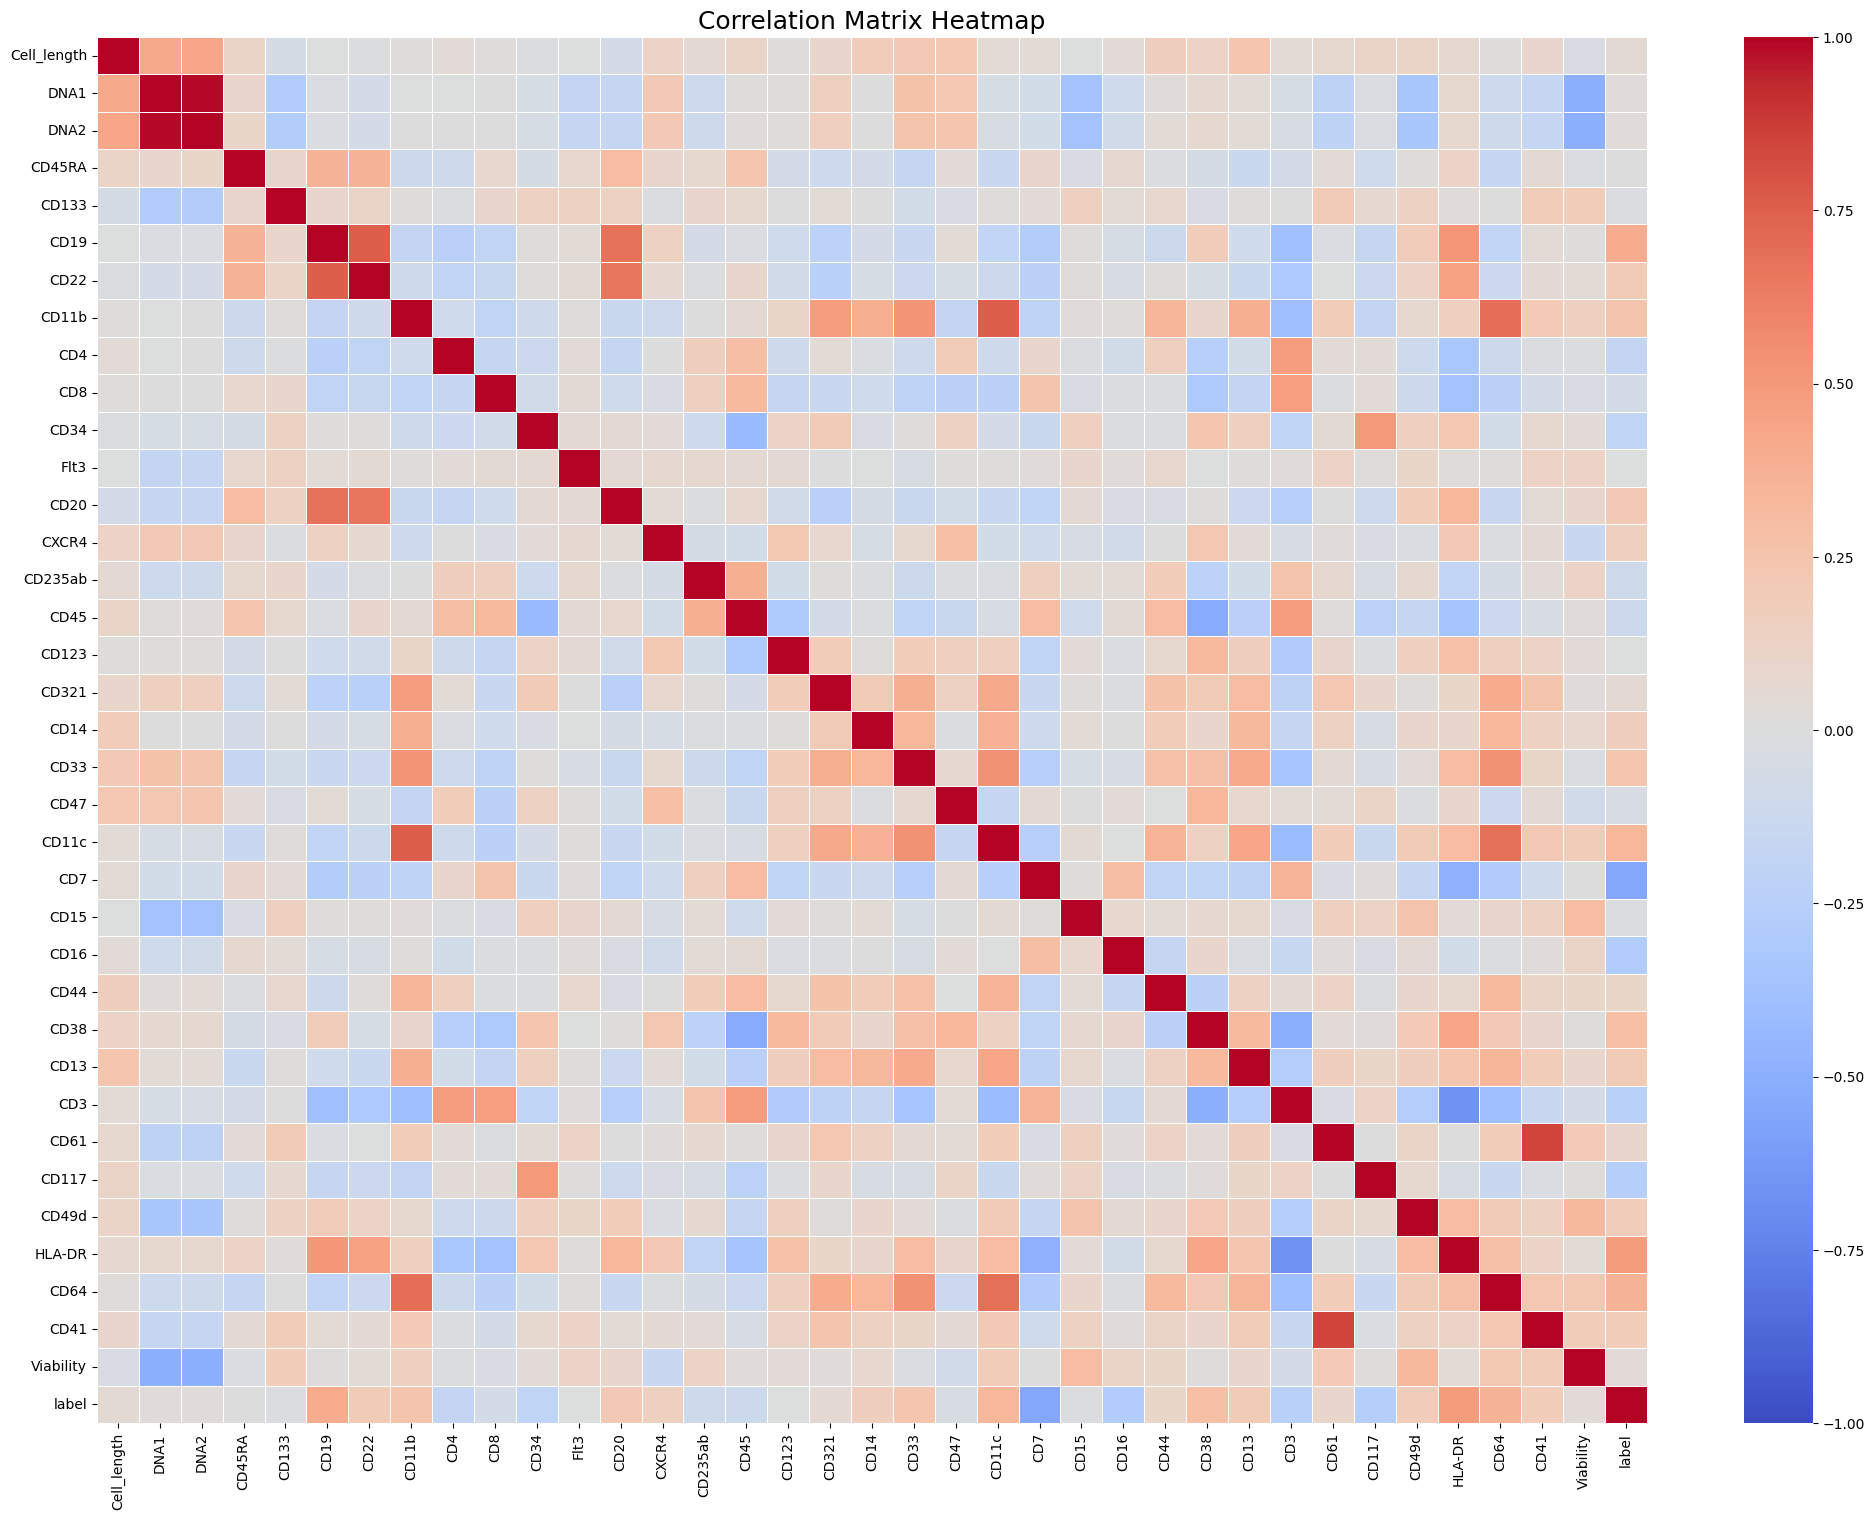

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
correlation_matrix = df.corr()
# Display the correlation matrix
correlation_matrix.round(2)
# Set the figure size
plt.figure(figsize=(25, 18))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot= False , cmap='coolwarm',vmin=-1,vmax=1, linewidths=0.5)
# Add a title
plt.title('Correlation Matrix Heatmap', fontsize=18)
# Show the plot
plt.show()


### **Setting the threshold**


In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of dll the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.8)
len(set(corr_features))

2

In [ ]:
corr_features

{'CD41', 'DNA2'}

### **Finding the range of each column**

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame to store max, min, and range values
summary_df = pd.DataFrame({
    'Max': df[numerical_columns].max(),
    'Min': df[numerical_columns].min(),
    'Range': df[numerical_columns].max() - df[numerical_columns].min()
})

# Display the summary DataFrame
print("Summary of Max, Min, and Range for Each Numerical Column:")
print(summary_df)


Summary of Max, Min, and Range for Each Numerical Column:
                   Max        Min      Range
Cell_length  65.000000  10.000000  55.000000
DNA1          7.001489   2.786488   4.215001
DNA2          7.472308   2.236450   5.235858
CD45RA        6.691197  -0.057305   6.748502
CD133         5.527494  -0.058081   5.585575
CD19          4.990085  -0.058089   5.048174
CD22          5.160477  -0.057342   5.217819
CD11b         5.260789  -0.058236   5.319025
CD4           6.581762  -0.057751   6.639513
CD8           4.693694  -0.058003   4.751697
CD34          5.147996  -0.058008   5.206004
Flt3          7.117323  -0.057884   7.175207
CD20          6.051411  -0.058132   6.109543
CXCR4         5.696674  -0.057042   5.753717
CD235ab       6.646699  -0.057612   6.704311
CD45          7.238076   2.040243   5.197833
CD123         6.640626  -0.058003   6.698630
CD321         6.867388  -0.053552   6.920940
CD14          5.006121  -0.057954   5.064075
CD33          5.612469  -0.058079   5.6705

### **Boxplot**

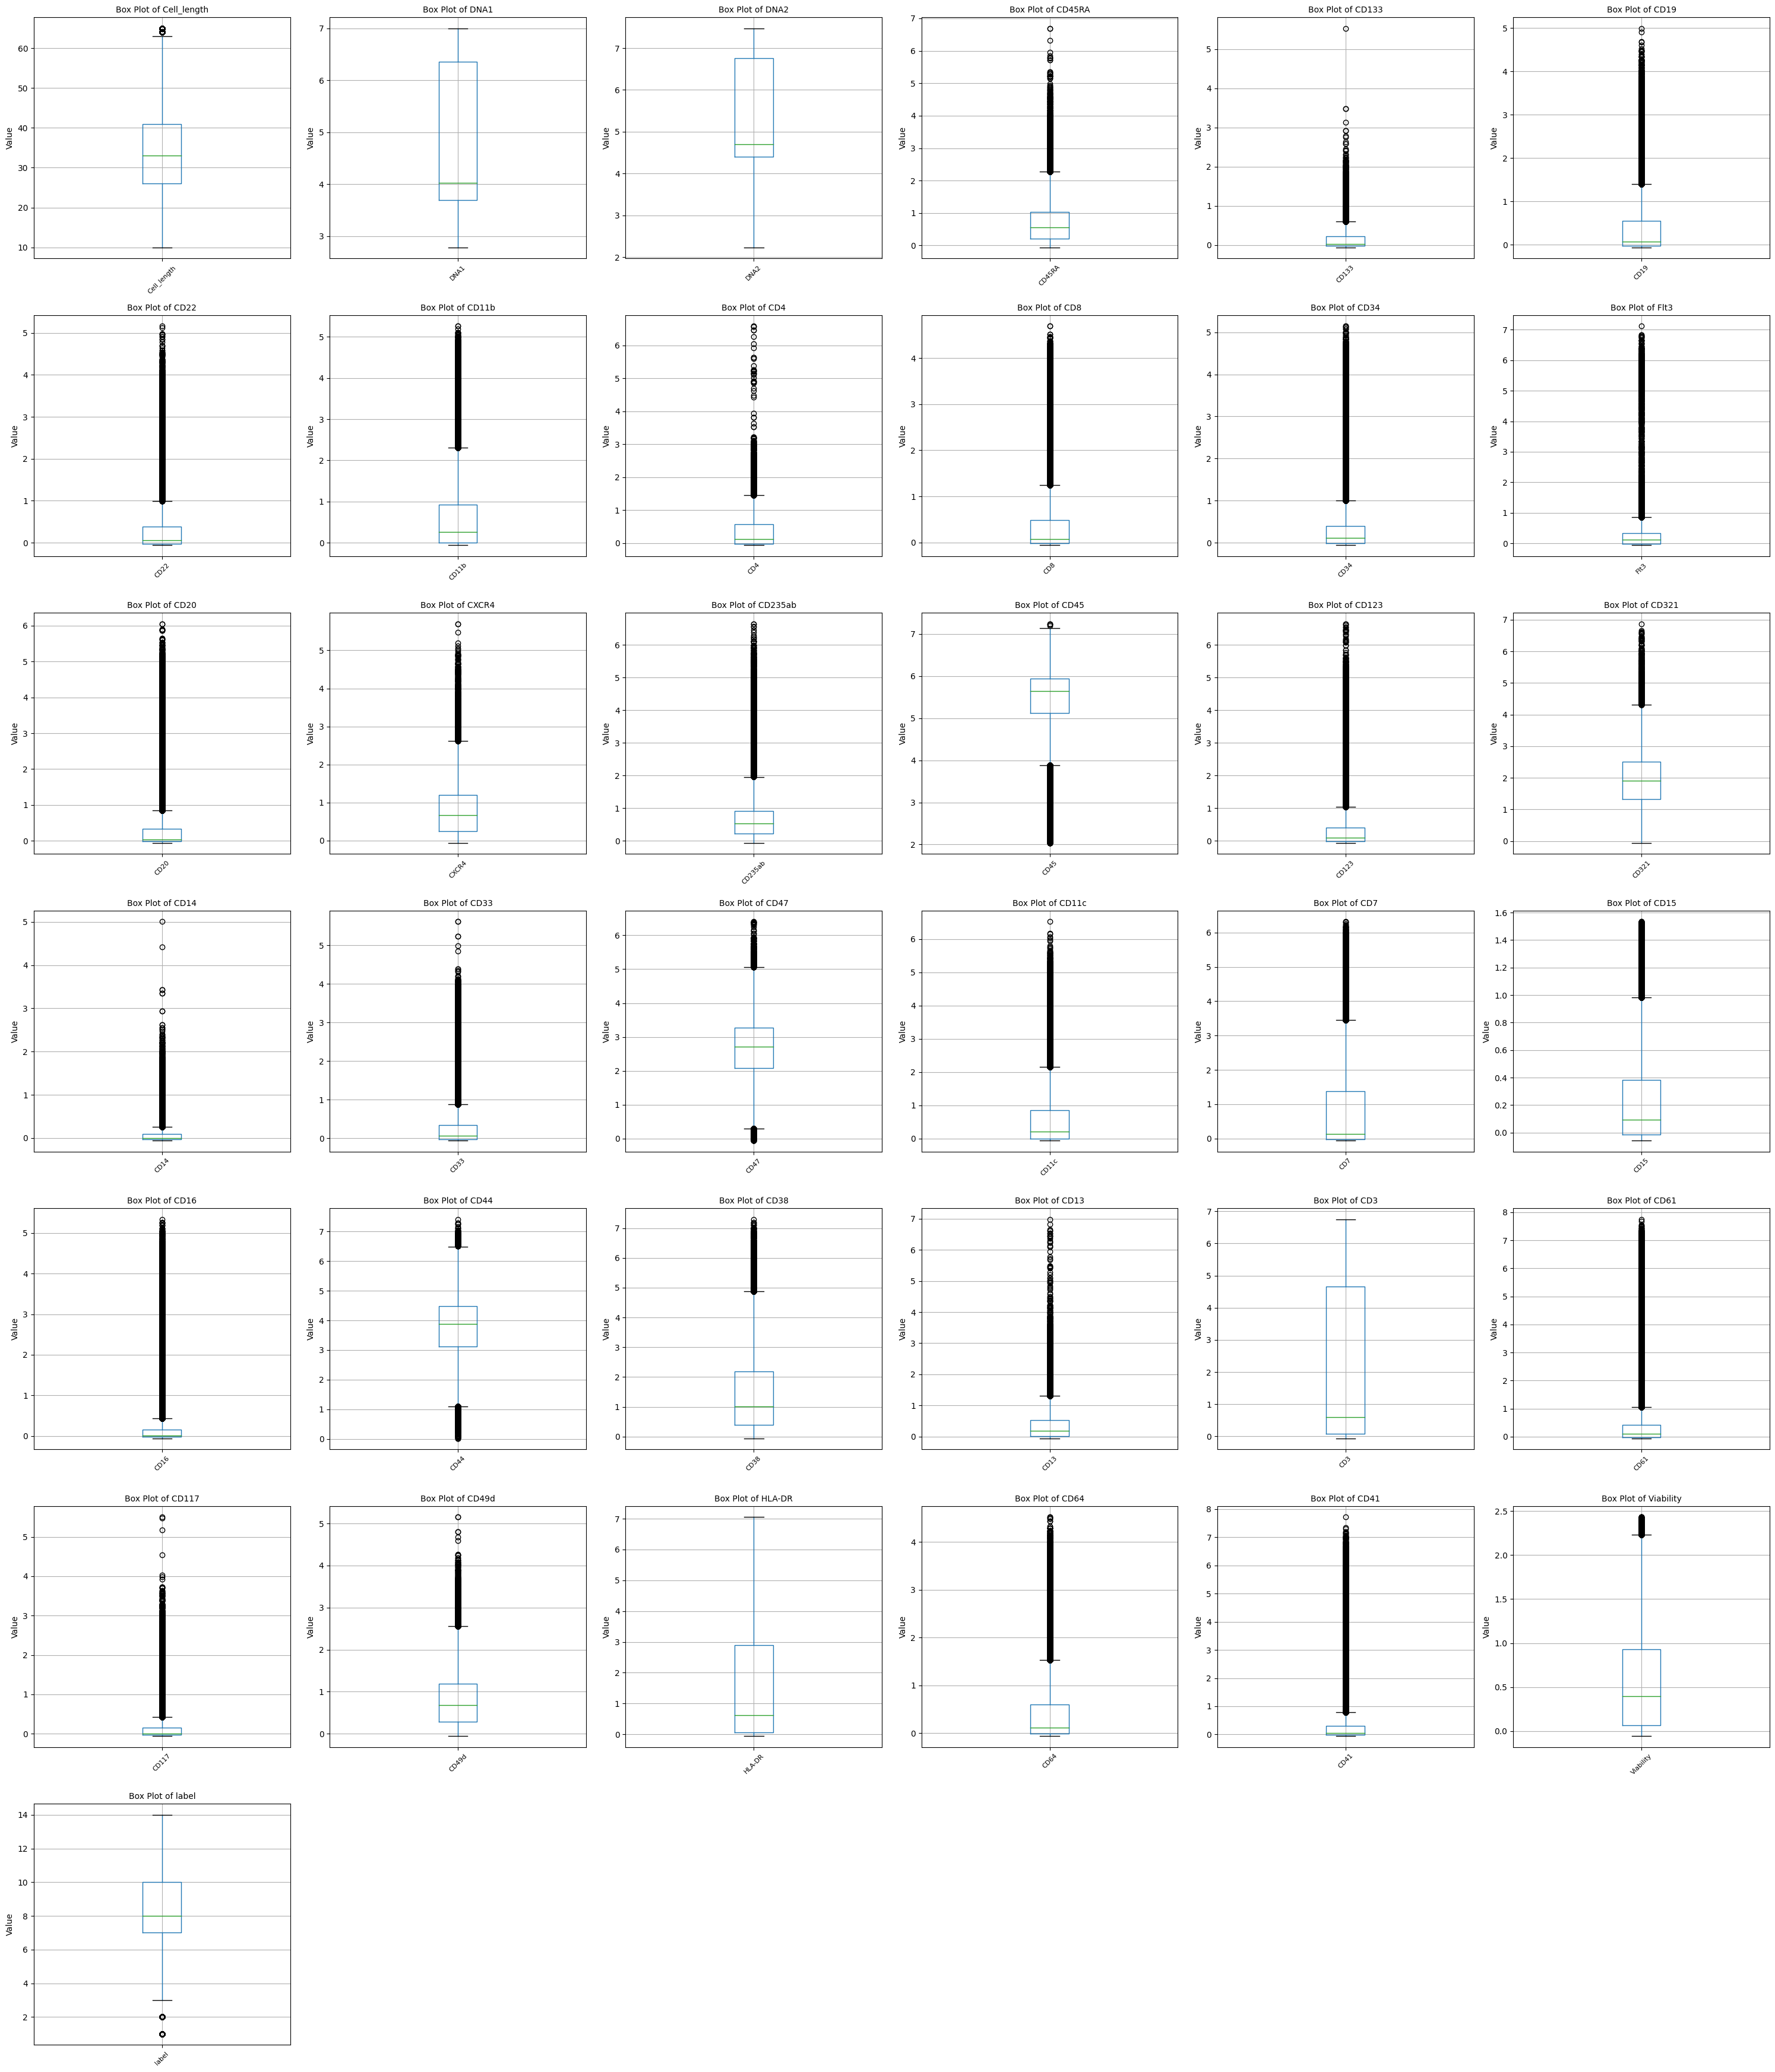

In [ ]:
n_cols = 6  # You can adjust this to 7, 8, 9, or 10 as needed
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Set a suitable figure size
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust height and width based on n_cols and n_rows

# Filter to include only valid numerical columns
valid_numerical_columns = [col for col in numerical_columns if col in df.columns]

# Loop through each valid numerical column to create individual box plots
for i, column in enumerate(valid_numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a grid of subplots
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column}', fontsize=10)
    plt.ylabel('Value', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### **Skewness¶**

             Skewness                   Category
Cell_length  0.527832               Right-skewed
DNA1         0.845010               Right-skewed
DNA2         0.779167               Right-skewed
CD45RA       1.191595               Right-skewed
CD133        2.141953               Right-skewed
CD19         1.682609               Right-skewed
CD22         2.283181               Right-skewed
CD11b        1.679089               Right-skewed
CD4          1.622044               Right-skewed
CD8          1.775713               Right-skewed
CD34         3.492437               Right-skewed
Flt3         7.098151               Right-skewed
CD20         2.754699               Right-skewed
CXCR4        0.955342               Right-skewed
CD235ab      2.001479               Right-skewed
CD45        -1.484824                Left-skewed
CD123        3.648890               Right-skewed
CD321        0.247097  Approximately symmetrical
CD14         3.609006               Right-skewed
CD33         2.72497

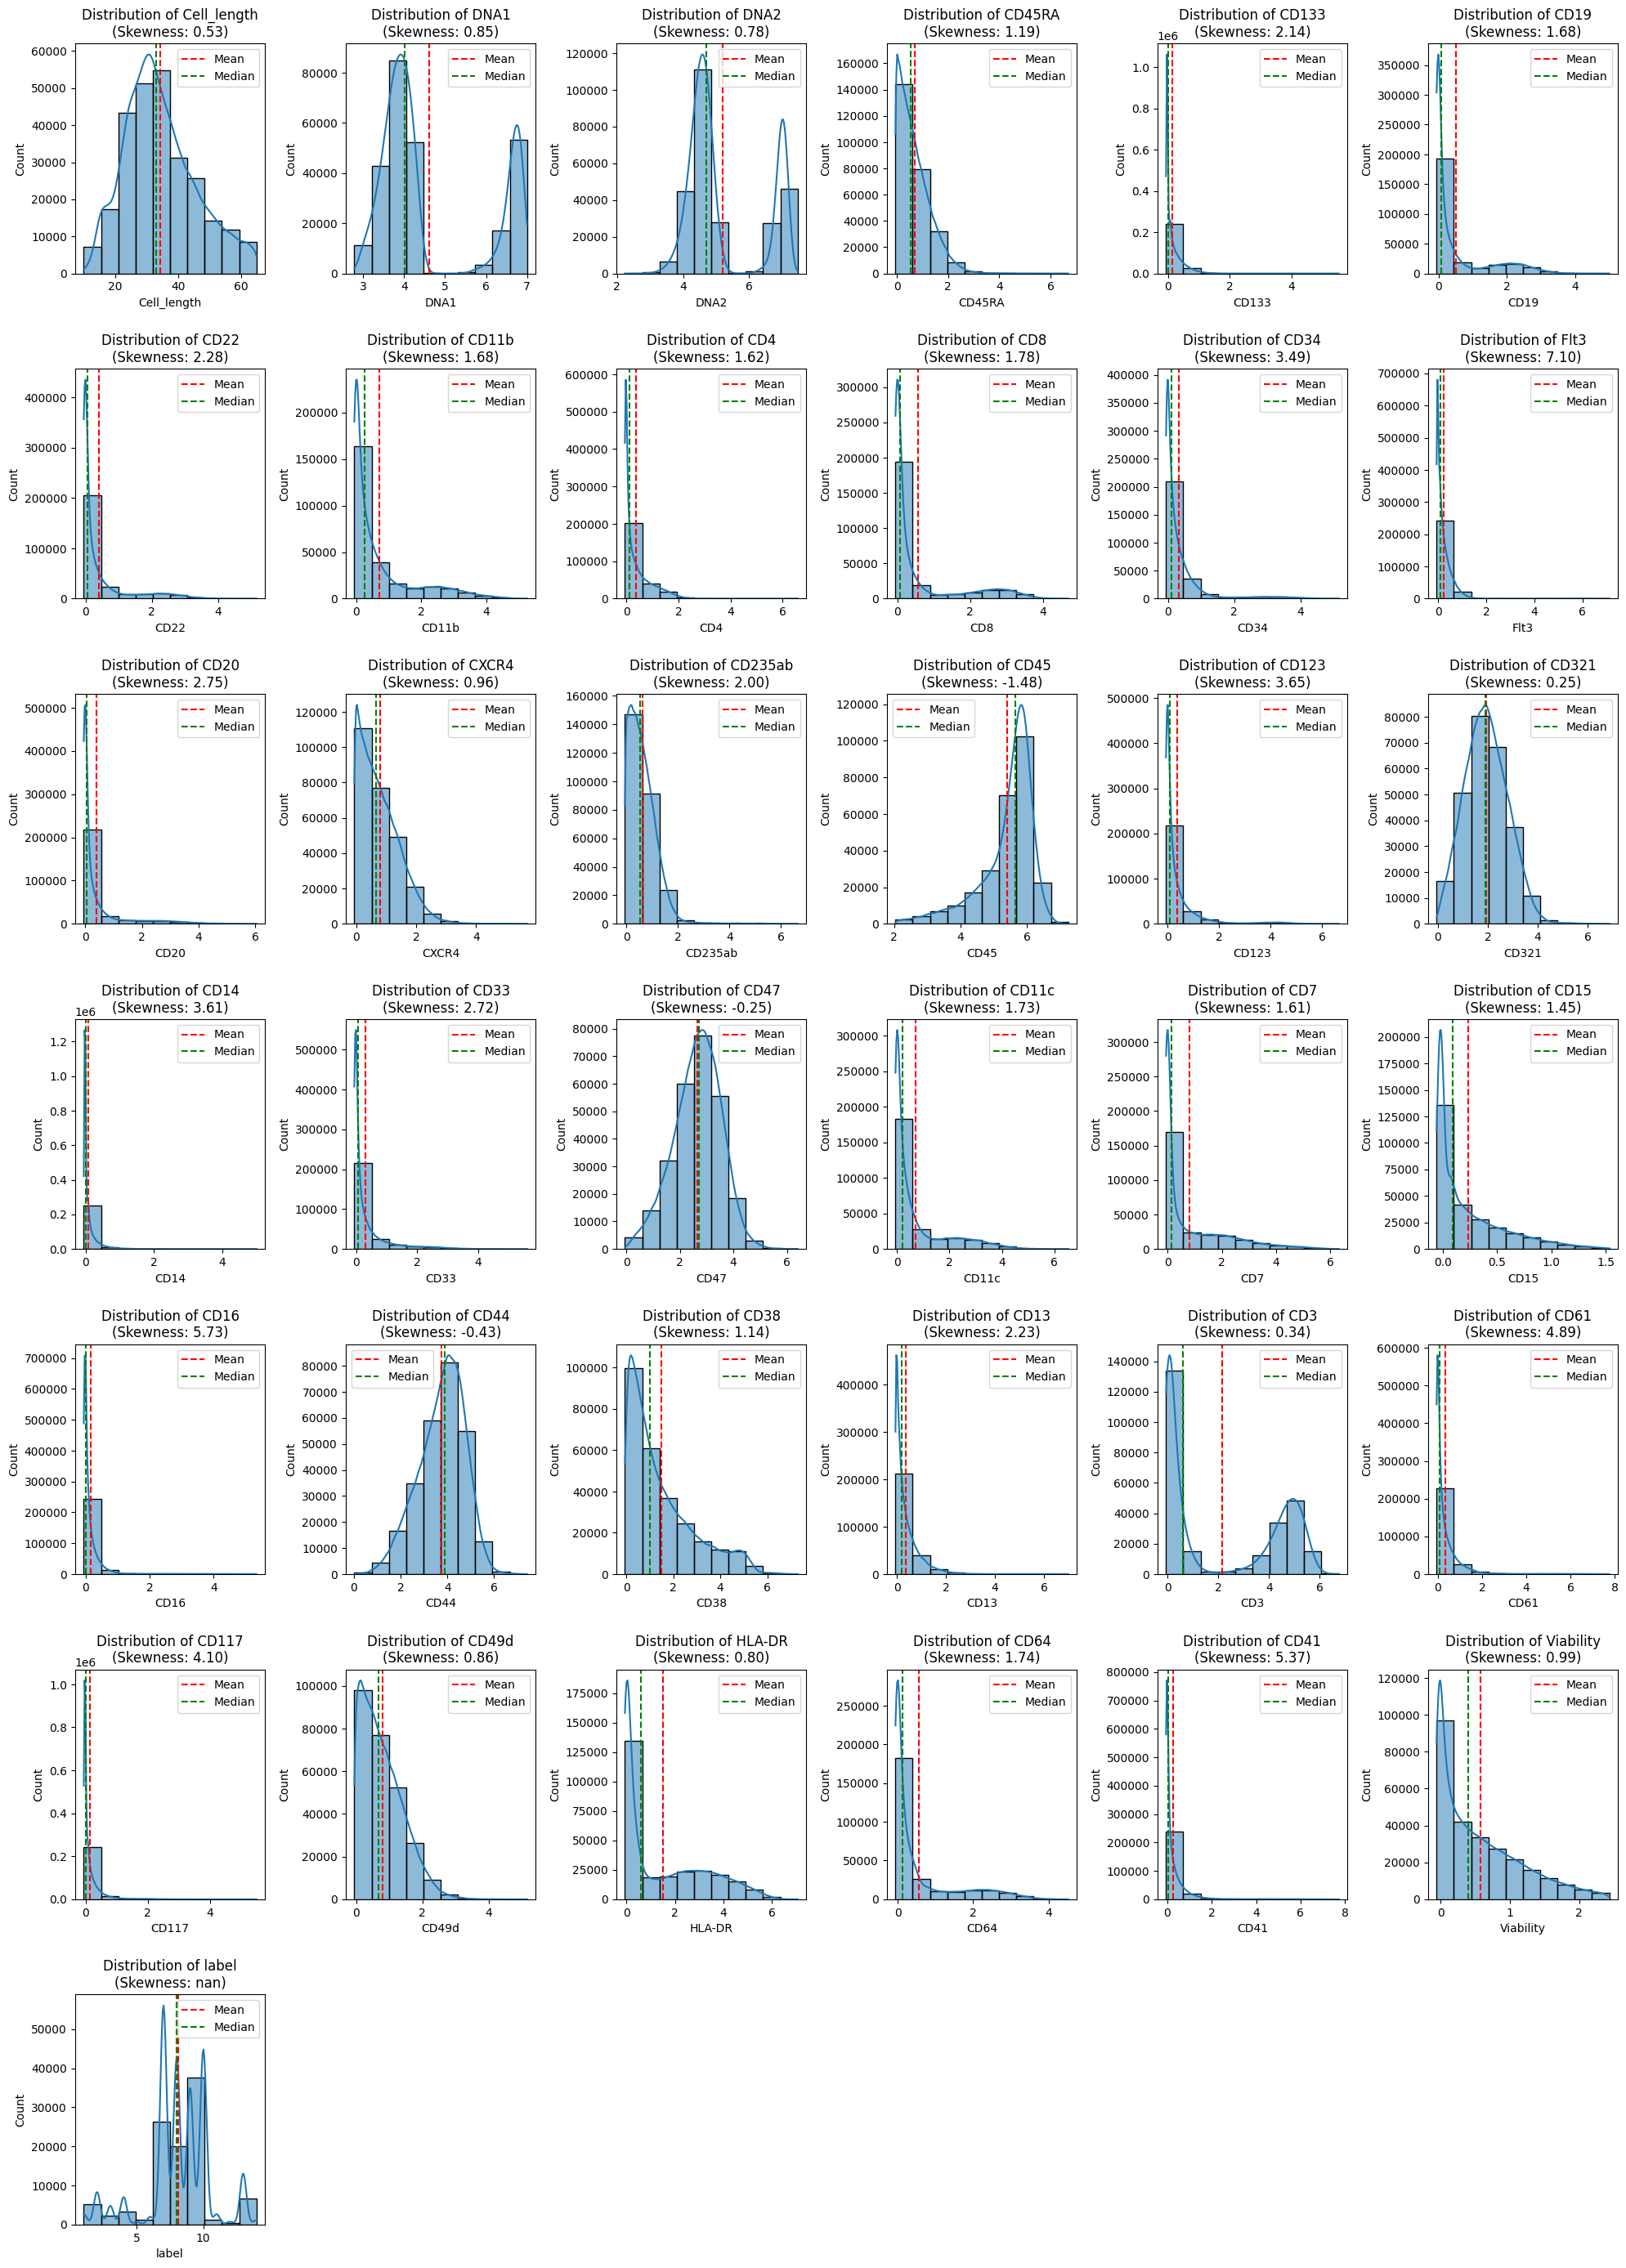

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd

skewness = df.apply(skew)

# Function to categorize skewness
def categorize_skewness(value):
    if value > 0.5:
        return 'Right-skewed'
    elif value < -0.5:
        return 'Left-skewed'
    else:
        return 'Approximately symmetrical'

# Apply the categorization
skewness_category = skewness.apply(categorize_skewness)

# Display skewness and its categorization
skewness_df = pd.DataFrame({'Skewness': skewness, 'Category': skewness_category})
print(skewness_df)

# Number of numerical columns
num_cols = len(df.columns)

# Create a grid of 6 plots per row
cols_per_row = 6
rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 4))
axes = axes.flatten()  # Flatten to make it easier to iterate through

# Plot histograms for each numerical column
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}\n(Skewness: {skewness[col]:.2f})')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', label='Median')
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


### **Kurtosis**

                  Column   Kurtosis                   Category
Cell_length  Cell_length   2.834033  Platykurtic (light tails)
DNA1                DNA1   1.994037  Platykurtic (light tails)
DNA2                DNA2   1.975021  Platykurtic (light tails)
CD45RA            CD45RA   4.964272  Leptokurtic (heavy tails)
CD133              CD133   9.190066  Leptokurtic (heavy tails)
CD19                CD19   4.590887  Leptokurtic (heavy tails)
CD22                CD22   7.500223  Leptokurtic (heavy tails)
CD11b              CD11b   4.964495  Leptokurtic (heavy tails)
CD4                  CD4   5.844261  Leptokurtic (heavy tails)
CD8                  CD8   4.745776  Leptokurtic (heavy tails)
CD34                CD34  16.596416  Leptokurtic (heavy tails)
Flt3                Flt3  85.583534  Leptokurtic (heavy tails)
CD20                CD20  10.435449  Leptokurtic (heavy tails)
CXCR4              CXCR4   3.936307  Leptokurtic (heavy tails)
CD235ab          CD235ab  13.440586  Leptokurtic (heavy

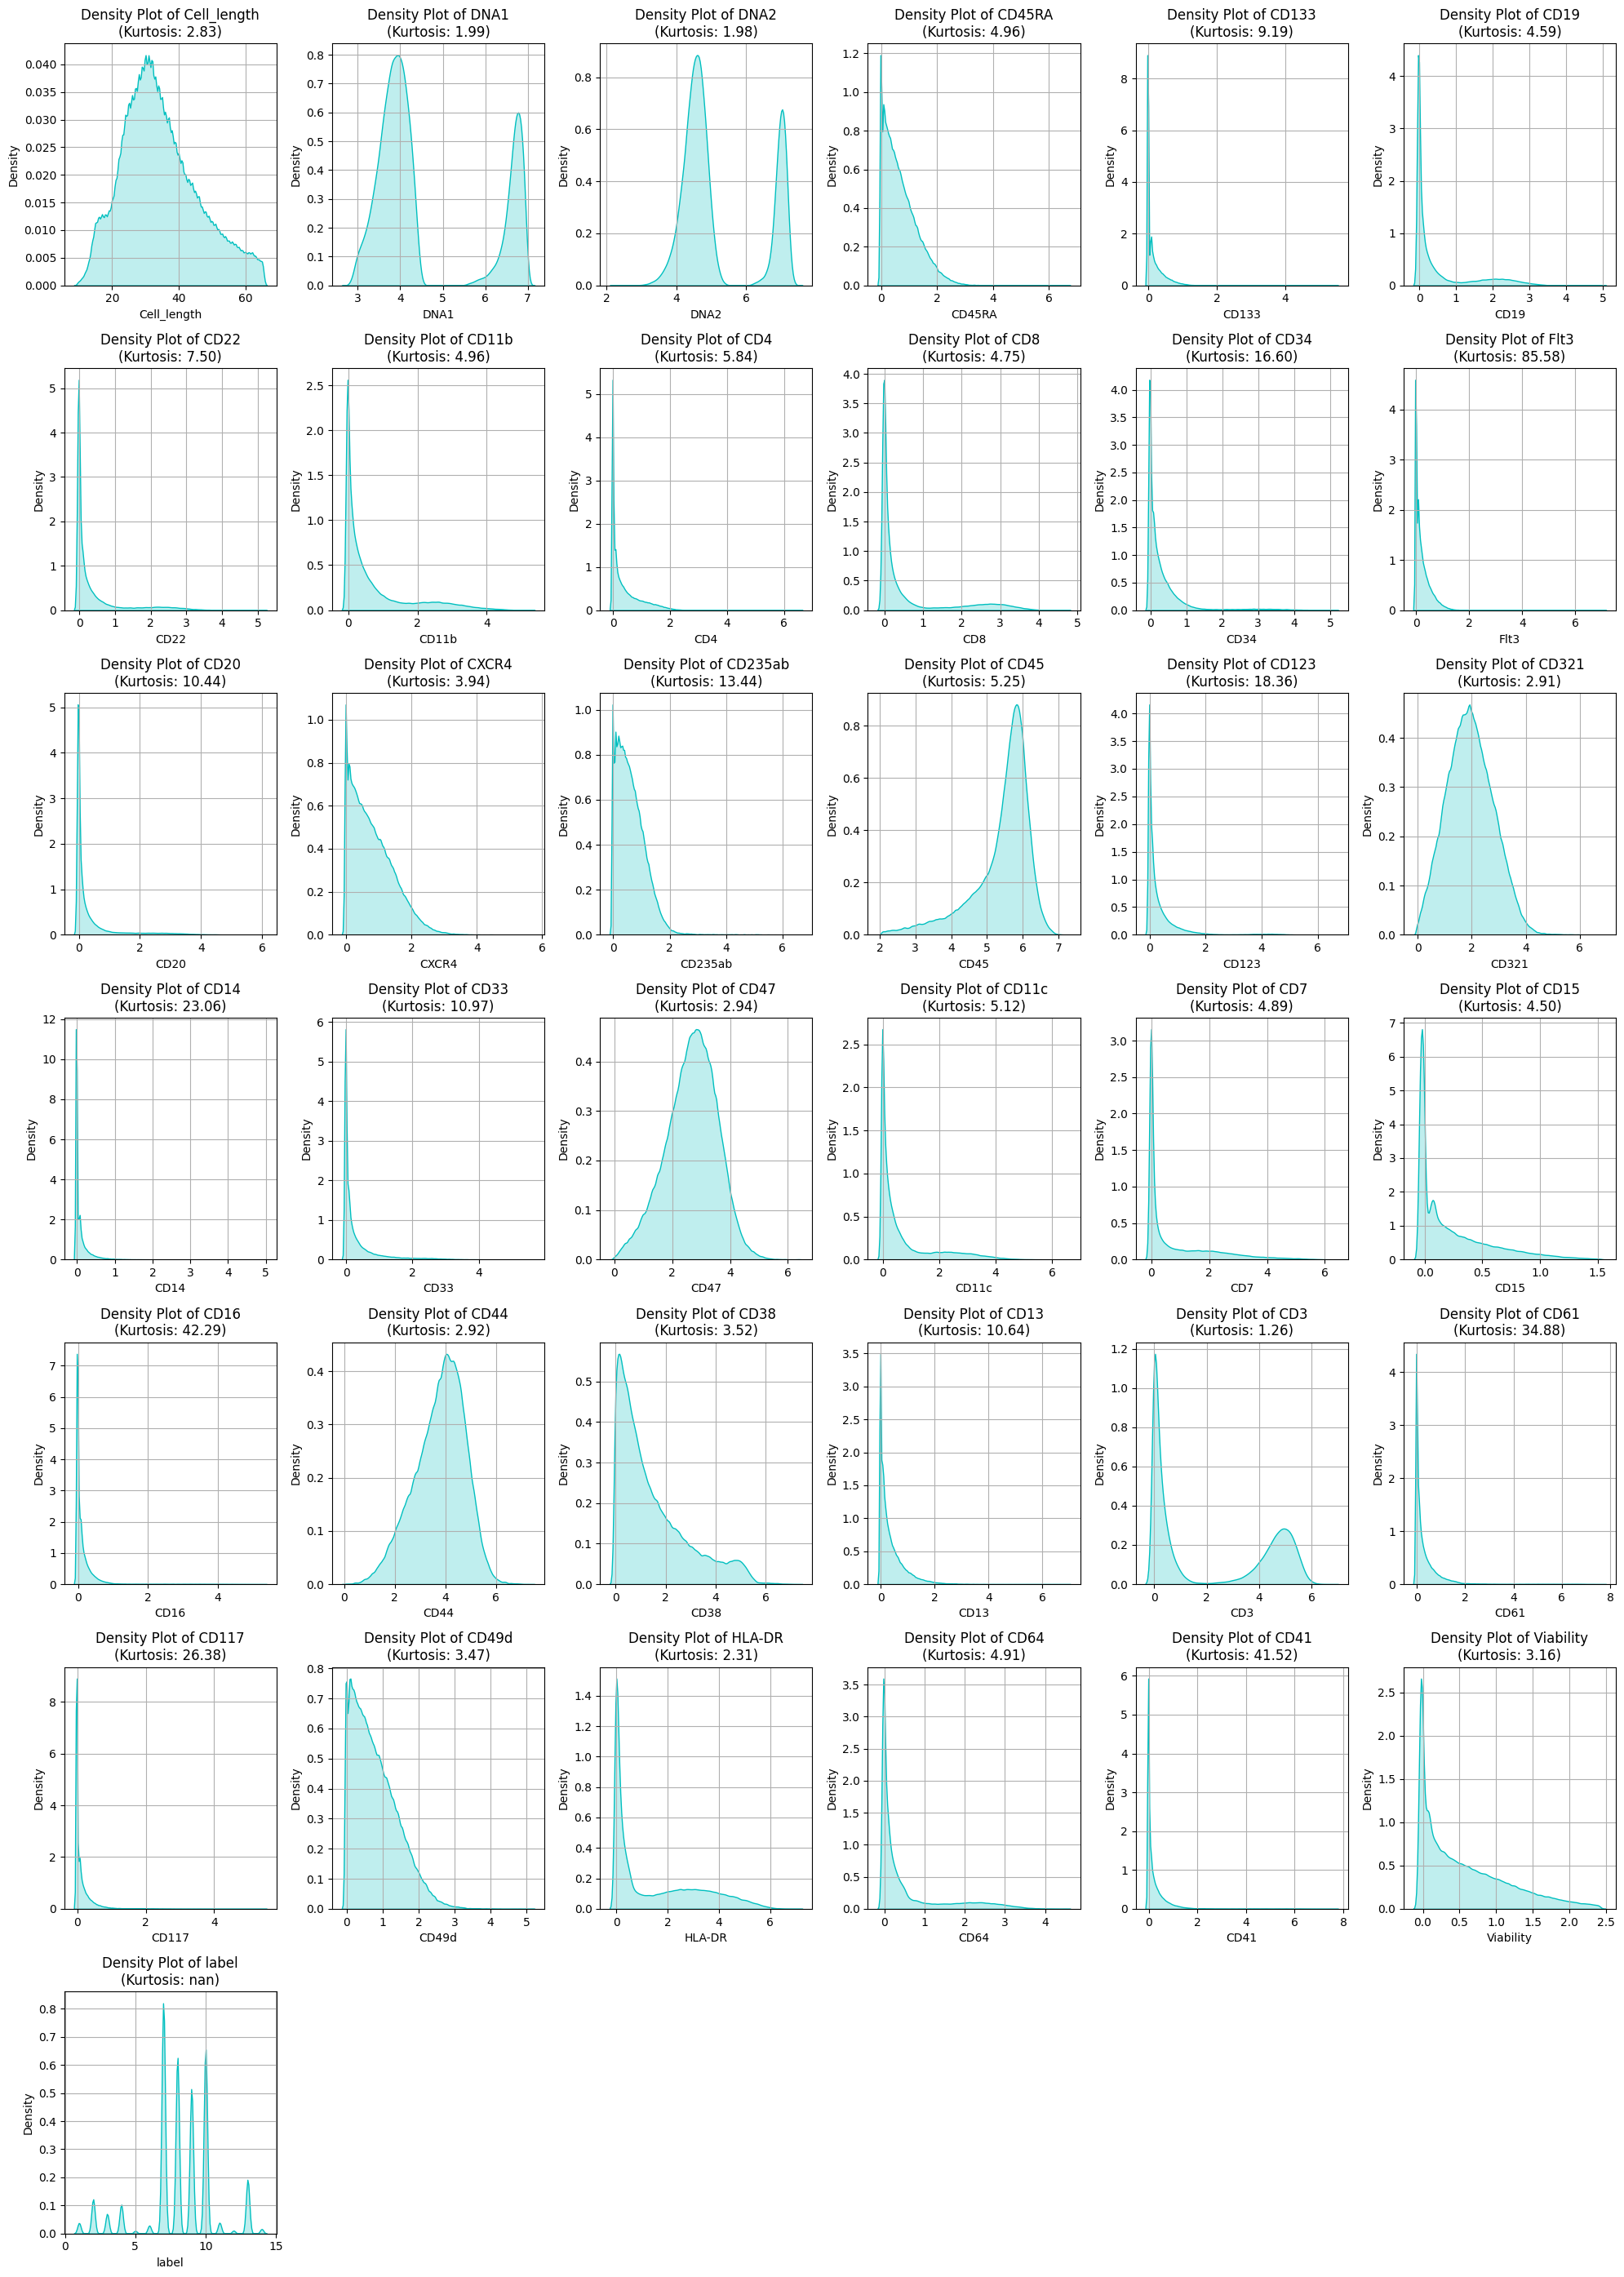

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Calculate kurtosis for each column
kurtosis_values = df.apply(kurtosis, fisher=False)  # Pearson kurtosis (normal = 3)

# Create a DataFrame with kurtosis values
kurtosis_df = pd.DataFrame({'Column': df.columns, 'Kurtosis': kurtosis_values})

# Categorize the kurtosis values (Leptokurtic, Mesokurtic, Platykurtic)
def categorize_kurtosis(value):
    if value > 3:
        return 'Leptokurtic (heavy tails)'
    elif value < 3:
        return 'Platykurtic (light tails)'
    else:
        return 'Mesokurtic (normal tails)'

kurtosis_df['Category'] = kurtosis_df['Kurtosis'].apply(categorize_kurtosis)

# Print the kurtosis values and their categories
print(kurtosis_df)

# Number of numerical columns
num_cols = len(df.columns)

# Create a grid of 6 plots per row
cols_per_row = 6
rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 4))
axes = axes.flatten()  # Flatten the axes array to make iteration easier

# Plot density for each column
for i, column in enumerate(df.columns):
    sns.kdeplot(df[column].dropna(), color='c', fill=True, bw_adjust=0.5, ax=axes[i])  # Adjust bandwidth for smoothness
    axes[i].set_title(f'Density Plot of {column}\n(Kurtosis: {kurtosis_df.loc[kurtosis_df["Column"] == column, "Kurtosis"].values[0]:.2f})')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


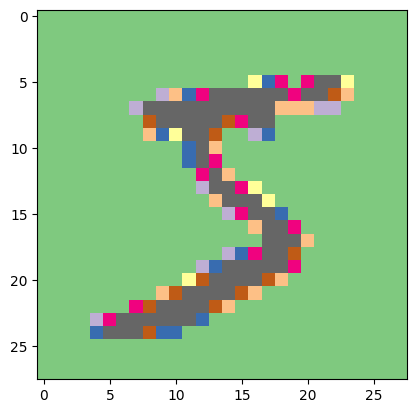

In [ ]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='Accent')

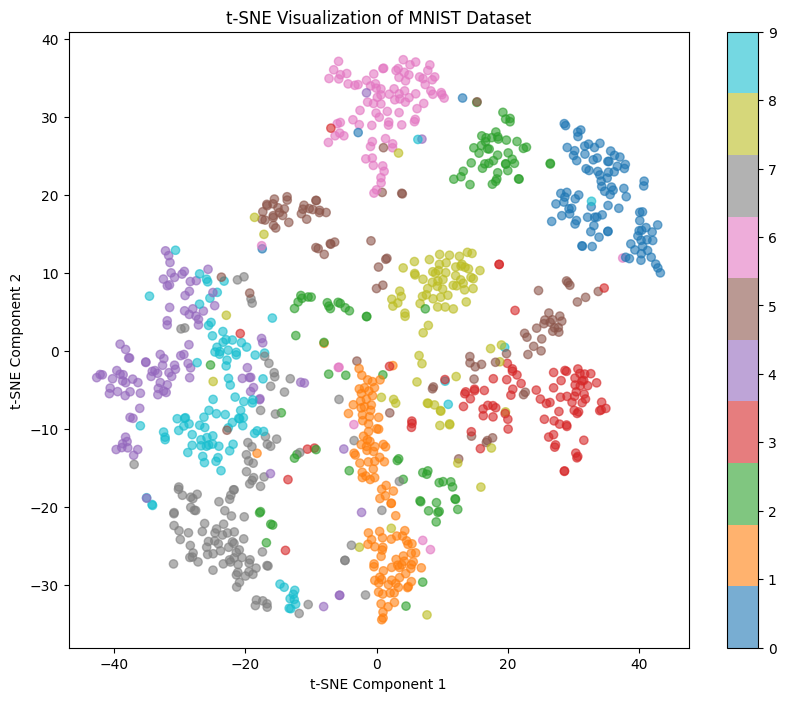

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
train_labels_subset = train_labels[:n_samples]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
train_images_tsne = tsne.fit_transform(train_images_flat)

# plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels_subset, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### **Standardizing the data**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)


scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

#  Display the first few rows of the standardized data
print(scaled_df.head())


   Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0    -1.087702 -0.164453 -0.505101 -0.862639 -0.677085 -0.601774 -0.434227   
1     0.047999 -0.202977 -0.331737  0.021706 -0.710621 -0.613387 -0.423702   
2    -0.214086 -0.585171 -0.705816 -0.138826 -0.687231 -0.507832 -0.577727   
3    -0.476171 -0.267476 -0.320127 -0.417630 -0.669470 -0.614562 -0.579163   
4    -0.825617 -0.479916 -0.601444 -1.144201 -0.679832 -0.500173  0.129202   

      CD11b       CD4       CD8  ...      CD13       CD3      CD61     CD117  \
0 -0.711371 -0.007722 -0.044861  ... -0.665941 -0.968994 -0.479732 -0.249511   
1  0.096608 -0.778973 -0.573653  ...  2.197090 -0.973786  1.262168 -0.132623   
2 -0.704150 -0.727475 -0.568752  ... -0.312734 -0.813227 -0.120582 -0.271310   
3  0.023115 -0.747355 -0.507239  ...  0.294199 -0.927985 -0.532490 -0.206663   
4  0.392818  0.357861 -0.531946  ...  0.438207 -0.894158 -0.242836 -0.438757   

      CD49d    HLA-DR      CD64      CD41  Viabili

## **PCA for 2D**

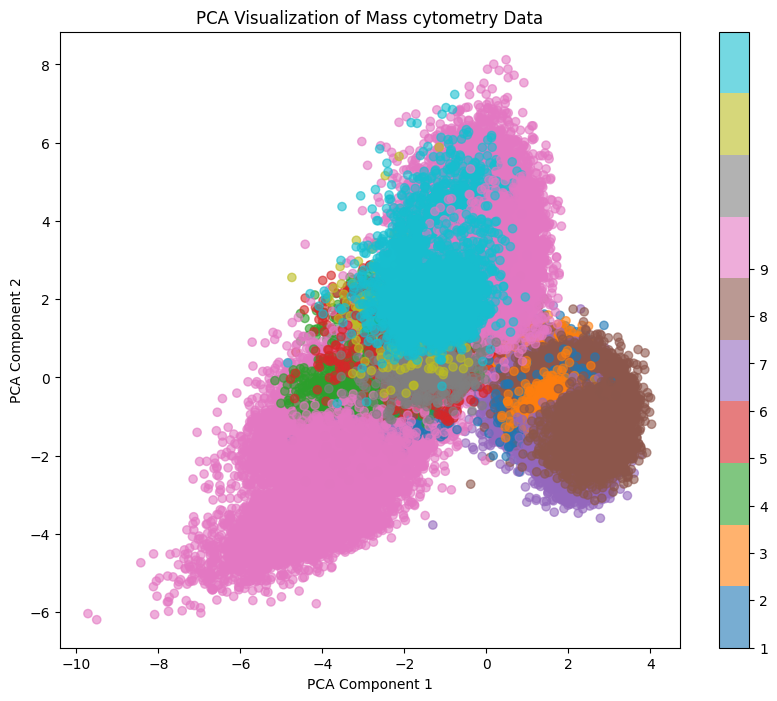

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Columns to exclude from the analysis
exclude_columns = ['Event', 'Time', 'file_number', 'event_number', 'label', 'individual']

# Dropping the columns to exclude
data_filtered = df.drop(exclude_columns, axis=1)

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filtered)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Adding PCA results to the original dataframe
df['PCA1'] = pca_results[:, 0]
df['PCA2'] = pca_results[:, 1]

# Plotting the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['label'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('PCA Visualization of Mass cytometry Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## **PCA for 3D**

Standard deviation: [2.53583711 2.20245521 1.89526477 1.61107568]
Proportion of Variance: [0.16922225 0.12765239 0.09452671 0.06830408]
Cumulative Proportion: [0.16922225 0.29687464 0.39140135 0.45970543]


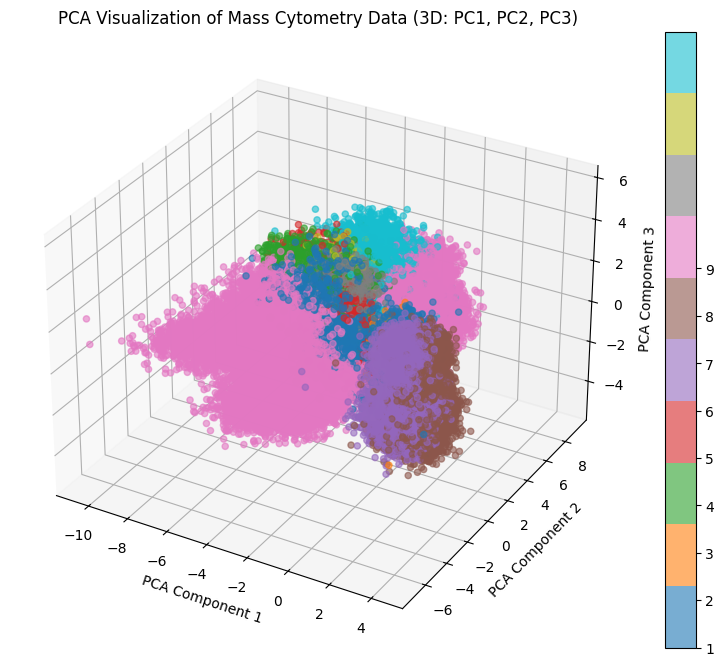

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Columns to exclude from the analysis
exclude_columns = ['Event', 'Time', 'file_number', 'event_number', 'label', 'individual']

# Dropping the columns to exclude
data_filtered = df.drop(exclude_columns, axis=1)

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filtered)

# Apply PCA with 4 components
pca = PCA(n_components=4)
pca_results = pca.fit_transform(scaled_data)

# Adding PCA results to the original dataframe
df['PCA1'] = pca_results[:, 0]
df['PCA2'] = pca_results[:, 1]
df['PCA3'] = pca_results[:, 2]
df['PCA4'] = pca_results[:, 3]

# Print the PCA results (Standard deviation, Proportion of variance, and Cumulative Proportion)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
standard_deviation = pca.singular_values_ / np.sqrt(len(data_filtered) - 1)

print(f"Standard deviation: {standard_deviation}")
print(f"Proportion of Variance: {explained_variance}")
print(f"Cumulative Proportion: {cumulative_variance}")

# Plotting the PCA results in 3D (PC1, PC2, PC3)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['label'], cmap='tab10', alpha=0.6)

# Add labels and title
ax.set_title('PCA Visualization of Mass Cytometry Data (3D: PC1, PC2, PC3)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Adding color bar
plt.colorbar(scatter, ticks=range(10))

plt.show()

### **T-SNE**

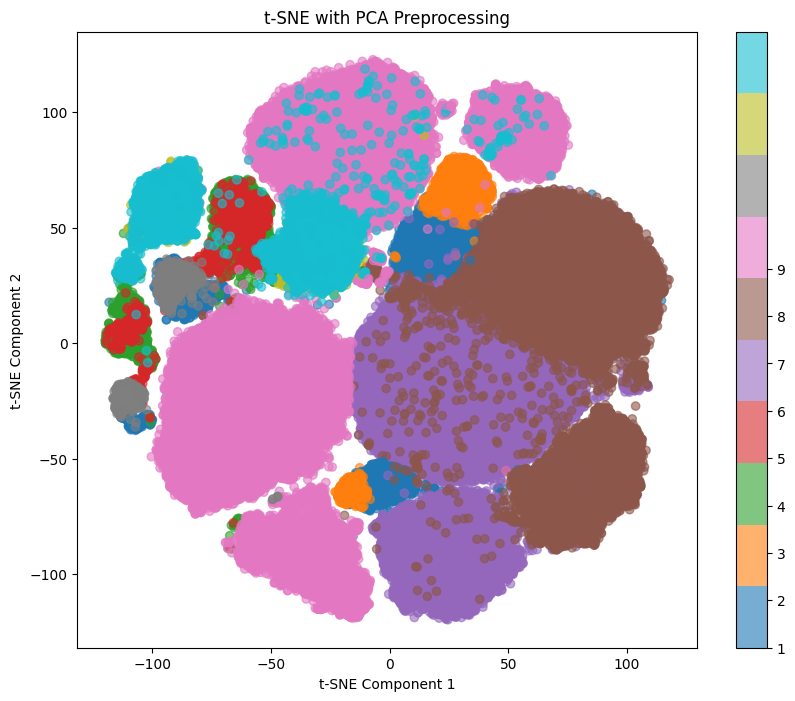

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Reduce dimensionality with PCA
pca = PCA(n_components=20)
pca_result = pca.fit_transform(scaled_data)

# Step 2: Apply t-SNE on PCA-reduced data
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_result)

# Step 3: Add t-SNE results to the dataframe
df['TSNE1'] = tsne_results[:, 0]
df['TSNE2'] = tsne_results[:, 1]

# Step 4: Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['TSNE1'], df['TSNE2'], c=df['label'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE with PCA Preprocessing')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


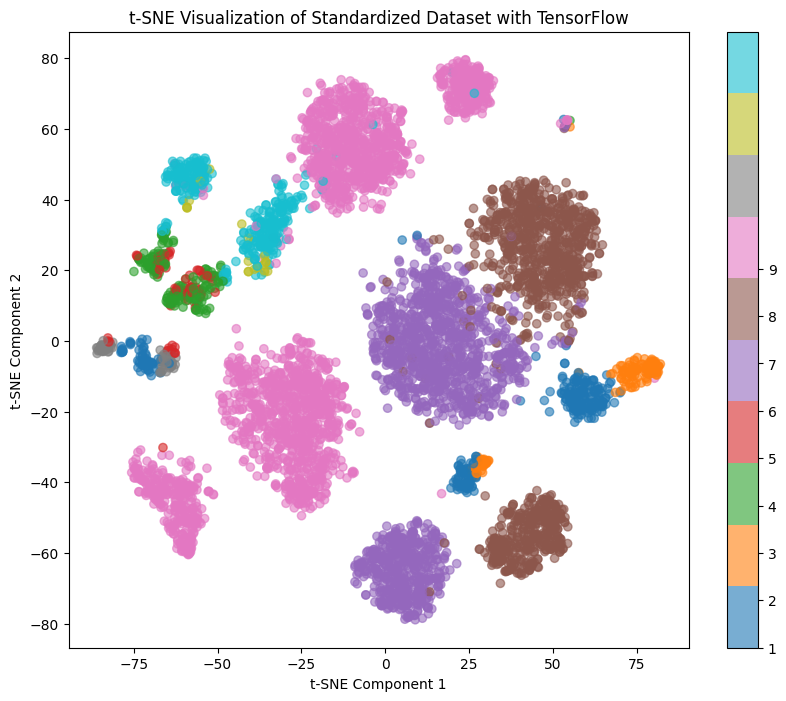

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

sample_df = df.sample(n=15000, random_state=42)  # Reduce the sample size to 1000 rows

# Exclude specific columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
features = sample_df.drop(columns=exclude_columns)
labels = sample_df['label']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert to TensorFlow tensor
features_tf = tf.convert_to_tensor(features_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features_tf)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of Standardized Dataset with TensorFlow')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


### On example data

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
demo_data = pd.DataFrame({
    'A': [5, 11, 18, 8],
    'B': [10, 40, 15, 30],
    'C': [9, 25, 35, 20]
})

p_m = 0.5

data_array = demo_data.values
mask = np.random.binomial(1, p_m, data_array.shape)
print("Generated Mask (1 represents masked values):\n", mask)

masked_data = np.where(mask == 1, np.nan, data_array)
masked_demo_data = pd.DataFrame(masked_data, columns=demo_data.columns)

print("\nOriginal DataFrame:\n", demo_data)
print("\nMasked DataFrame:\n", masked_demo_data)


Generated Mask (1 represents masked values):
 [[0 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 1]]

Original DataFrame:
     A   B   C
0   5  10   9
1  11  40  25
2  18  15  35
3   8  30  20

Masked DataFrame:
       A     B     C
0   5.0   NaN   NaN
1   NaN  40.0  25.0
2  18.0   NaN   NaN
3   NaN  30.0   NaN


In [ ]:
import pandas as pd
import numpy as np

data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500],
    'D': [120,300,231,450,200],
    'E': [12,30,31,40,20]
}
df = pd.DataFrame(data)

shuffled_df = df.apply(np.random.permutation)

print("Original DataFrame:")
print(df)
print("\nDataFrame with shuffled column values:")
print(shuffled_df)


Original DataFrame:
   A   B    C    D   E
0  1  10  100  120  12
1  2  20  200  300  30
2  3  30  300  231  31
3  4  40  400  450  40
4  5  50  500  200  20

DataFrame with shuffled column values:
   A   B    C    D   E
0  1  30  300  300  12
1  3  20  400  450  20
2  5  50  100  231  31
3  2  10  500  200  40
4  4  40  200  120  30


In [ ]:
import pandas as pd
import numpy as np

data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500],
    'D': [1000, 2000, 3000, 4000, 5000],
    'E': [10000, 20000, 30000, 40000, 50000]
}
x = pd.DataFrame(data)

m = pd.DataFrame(np.random.binomial(1, 0.5, x.shape), columns=x.columns)
x_shuffled = x.apply(np.random.permutation)
x_corrupted = x * (1 - m) + x_shuffled * m

print("Original DataFrame (x):")
print(x)
print("\nBinary Mask (m):")
print(m)
print("\nShuffled DataFrame (x_shuffled):")
print(x_shuffled)
print("\nCorrupted DataFrame (x_corrupted):")
print(x_corrupted)


Original DataFrame (x):
   A   B    C     D      E
0  1  10  100  1000  10000
1  2  20  200  2000  20000
2  3  30  300  3000  30000
3  4  40  400  4000  40000
4  5  50  500  5000  50000

Binary Mask (m):
   A  B  C  D  E
0  0  1  0  1  0
1  1  1  0  0  1
2  1  0  0  0  0
3  1  1  1  0  0
4  0  1  0  0  1

Shuffled DataFrame (x_shuffled):
   A   B    C     D      E
0  1  10  100  5000  30000
1  4  30  500  3000  20000
2  2  50  300  2000  10000
3  3  20  200  1000  40000
4  5  40  400  4000  50000

Corrupted DataFrame (x_corrupted):
   A   B    C     D      E
0  1  10  100  5000  10000
1  4  30  200  2000  20000
2  2  30  300  3000  30000
3  3  20  200  4000  40000
4  5  40  500  5000  50000


## On the real dataset

In [ ]:
# Separate labeled and unlabeled data based on non-NaN and NaN values in the 'label' column
df_labeled = df[df['label'].notnull()]
df_unlabeled = df[df['label'].isnull()]

# Print the shapes of labeled and unlabeled data
print("Labeled Data Shape:", df_labeled.shape)
print("Unlabeled Data Shape:", df_unlabeled.shape)


Labeled Data Shape: (104184, 37)
Unlabeled Data Shape: (161443, 37)


In [ ]:
from sklearn.model_selection import train_test_split
# Separate labeled and unlabeled data
df_labeled = df[df['label'].notnull()]  # Labeled data
df_unlabeled = df[df['label'].isnull()]  # Unlabeled data

# Separate features and target for labeled data
x_labeled = df_labeled.drop(columns=['label'])  # Features
y_labeled = df_labeled['label']                  # Target

# Separate features for unlabeled data
x_unlabeled = df_unlabeled.drop(columns=['label'])  # Features (no labels)

# Split the labeled data into training and testing sets (e.g., 70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

print("\nTraining Features (x_train):\n", x_train.head())
print("\nTraining Labels (y_train):\n", y_train.head())
print("\nTesting Features (x_test):\n", x_test.head())
print("\nTesting Labels (y_test):\n", y_test.head())



Training Features (x_train):
        Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
64113           25  3.899656  4.594272  0.976652  0.302811  0.154761   
82744           31  6.592998  6.901888  0.431481 -0.052898 -0.037690   
24294           41  3.543583  4.467671  0.377192  0.219081  0.245478   
7820            38  4.305227  4.881685  0.199351  0.100678 -0.025812   
43295           26  4.159271  4.861015  0.831285  0.191518  2.002712   

           CD22     CD11b       CD4       CD8  ...      CD38      CD13  \
64113 -0.011676  3.180236  1.465950  0.086209  ...  1.563844  0.480488   
82744 -0.029715 -0.040846  0.914311  0.022305  ...  1.232765  0.100678   
24294  0.193328  0.075123  0.936352 -0.044813  ...  0.486930  0.046766   
7820  -0.002898  1.437247 -0.013400 -0.001012  ...  1.250272  0.731957   
43295  3.387782  0.179219  0.115231 -0.010963  ...  2.883403  0.345273   

            CD3      CD61     CD117     CD49d    HLA-DR      CD64      CD41  \
64113  0.017

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the unlabeled data
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)

# Convert back to a DataFrame if needed (optional, for better readability)
x_unlabeled_scaled = pd.DataFrame(x_unlabeled_scaled, columns=x_unlabeled.columns)



In [ ]:
from sklearn.model_selection import train_test_split
df_labeled = df[df['label'].notnull()]  # Labeled data
df_unlabeled = df[df['label'].isnull()]  # Unlabeled data

# Separate features and target for labeled data
X_labeled = df_labeled.drop(columns=['label'])  # Features
y_labeled = df_labeled['label']                  # Target


# Split the labeled data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of Training Features (X_train):", X_train.shape)
print("Shape of Training Labels (y_train):", y_train.shape)
print("Shape of Testing Features (X_test):", X_test.shape)



Shape of Training Features (X_train): (72928, 36)
Shape of Training Labels (y_train): (72928,)
Shape of Testing Features (X_test): (31256, 36)


## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def logit(x_train, y_train, x_test):
    """Logistic Regression.

    Args:
        x_train: Training features.
        y_train: Training labels.
        x_test: Testing features.

    Returns:
        y_test_hat: Predicted probabilities for x_test.
    """
    # Convert labels into proper format
    if len(y_train.shape) > 1:
        y_train = donvert_matrix_to_vector(y_train)

    # Define and fit the model on the training dataset
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # Predict probabilities on x_test
    y_test_hat = model.predict_proba(x_test)

    return y_test_hat


In [ ]:
y_test_prob = logit(X_train, y_train, X_test)

# Display the probabilities
print("Predicted probabilities for the test set:")
print(y_test_prob)

# Compute log loss
log_loss_value = log_loss(y_test, y_test_prob)

# Display log loss
print("Log loss for the test set:", log_loss_value)


Predicted probabilities for the test set:
[[1.27832255e-12 2.06977665e-16 3.99046638e-17 ... 7.92486068e-13
  3.66276613e-14 1.83700781e-13]
 [3.53829724e-14 5.62561775e-14 9.40919132e-16 ... 1.07032765e-11
  2.42897888e-04 1.52985856e-10]
 [9.66721886e-11 2.33132685e-10 3.73727689e-12 ... 1.13644612e-10
  1.28665515e-06 3.89190497e-11]
 ...
 [8.97193682e-08 1.11777043e-05 1.13462283e-08 ... 2.18504192e-08
  2.32788580e-10 2.44061608e-10]
 [4.43450554e-09 3.80180801e-10 2.59394355e-11 ... 1.75572500e-08
  5.96201221e-06 2.02390897e-07]
 [2.07984818e-09 7.62212185e-09 7.21995065e-11 ... 3.49653489e-11
  5.64646108e-08 4.47350113e-12]]
Log loss for the test set: 0.033144266653965554


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## XGBoost Model

In [ ]:

from xgboost import XGBClassifier
from sklearn.metrics import log_loss
import numpy as np

def xgboost_model(x_train, y_train, x_test):
    """XGBoost Classifier.

    Args:
        x_train: Training features.
        y_train: Training labels.
        x_test: Testing features.

    Returns:
        y_test_prob: Predicted probabilities for x_test.
    """
    # Convert labels to proper format and zero-based index if necessary
    if len(y_train.shape) > 1:
        y_train = donvert_matrix_to_vector(y_train)

    y_train = y_train.astype(int) - 1  # Convert to integer and zero-based index

    # Define and fit the XGBoost model on the training dataset
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(x_train, y_train)

    # Predict probabilities on x_test
    y_test_prob = model.predict_proba(x_test)

    return y_test_prob

# Example usage
# Assuming y_test is the true labels for X_test
y_test_zero_based = y_test.astype(int) - 1  # Adjust y_test for log loss calculation
y_test_prob = xgboost_model(X_train, y_train, X_test)

# Display the probabilities
print("Predicted probabilities for the test set:")
print(y_test_prob)

# Compute log loss
log_loss_value = log_loss(y_test_zero_based, y_test_prob)
print("Log loss for the test set:", log_loss_value)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:29:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Predicted probabilities for the test set:
[[5.1860439e-07 5.7017002e-07 3.9342234e-07 ... 8.7231638e-07
  7.8322529e-07 5.8524296e-07]
 [8.1559443e-07 1.7004106e-06 6.5709958e-07 ... 1.0578590e-06
  1.6773043e-05 2.0757868e-06]
 [5.4707510e-07 7.7939086e-07 5.7252436e-07 ... 1.0011939e-06
  4.1819862e-06 9.0937459e-07]
 ...
 [7.2769092e-07 3.8095675e-06 7.3217876e-07 ... 6.5145679e-07
  5.3072574e-07 4.8228475e-07]
 [2.6380076e-06 2.8987354e-06 2.4175074e-06 ... 4.4621897e-06
  1.0261622e-05 3.1510957e-05]
 [8.4509293e-07 7.6321942e-07 6.7003754e-07 ... 7.0236740e-07
  3.7610098e-06 9.6112626e-07]]
Log loss for the test set: 0.00400363072165128


In [ ]:
def binary_mask(p_m, data):
    """Generates a binary mask with probability p_m for corruption."""
    return pd.DataFrame(np.random.binomial(1, p_m, data.shape), columns=data.columns)

def x_corruption(mask, data):
    """Applies corruption to the data using the mask."""
    shuffled = data.apply(lambda col: np.random.permutation(col))
    return data * (1 - mask) + shuffled * mask

In [ ]:
from keras.layers import Input,Dense
from keras.models import Model
from keras import models
import numpy as np

def self_supervised(x_unlabeled_scaled,p_m, alpha, parameters):

  # extract the batch_size and epochs
  epochs = parameters['epochs']
  batch_size = parameters['batch_size']
  _,dimension = x_unlabeled_scaled.shape

  # model creation
  # defining an encoder
  # auto encoder ---> corrupted input ---> encoder ----> latent space ---> decoder
  # working on the encoder part and extracting the latent space
  # creating a fully connecting network with the number of neurons in the forst layer equal to the number of features present in the dataset
  # input_layer will be of size 37
  input_layer = Input(shape=(dimension,))

  #encoder model
  h = Dense(int(dimension),activation='relu')(input_layer)

  #output1 ---> mask estimation
  output1 = Dense(int(dimension) , activation='sigmoid', name='mask_estimation')(h)

  #output2 ---> feature estimation
  output2 = Dense(int(dimension) , activation='sigmoid', name='feature_estimation')(h)

  model = Model(inputs = input_layer, outputs=[output1,output2])
  model.compile(optimizer="rmsprop",loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},loss_weights={'mask_estimation': 1.0, 'feature_estimation': alpha})

  # Generate corrupted data and mask
  corruption_mask = binary_mask(p_m,x_unlabeled_scaled)
  x_unlabeled_corrupted = x_corruption(corruption_mask, x_unlabeled_scaled)
  m_label = (x_unlabeled_scaled != x_unlabeled_corrupted).astype(int) # Calculate m_label

  # Fit the model
  model.fit(x_unlabeled_corrupted,{'mask_estimation':m_label,'feature_estimation':x_unlabeled_scaled},epochs=epochs,batch_size=batch_size)

  name_of_layer = model.layers[1].name # Assuming the encoder layer is the second layer
  layer_output = model.get_layer(name_of_layer).output
  encoder = models.Model(inputs=model.input , outputs=layer_output)
  model.summary()
  return encoder

In [ ]:

x_unlab = x_unlabeled_scaled

p_m=0.3

alpha= 2.0

parameters={'batch_size':128,
            'epochs':50,
            }

encoder_model =self_supervised(x_unlab,p_m, alpha, parameters)


Epoch 1/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6372 - loss: 2.3818 - mask_estimation_loss: 1.7446
Epoch 2/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6106 - loss: 1.9928 - mask_estimation_loss: 1.3822
Epoch 3/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - feature_estimation_loss: 0.6095 - loss: 1.9794 - mask_estimation_loss: 1.3700
Epoch 4/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.6085 - loss: 1.9718 - mask_estimation_loss: 1.3633
Epoch 5/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.6080 - loss: 1.9674 - mask_estimation_loss: 1.3594
Epoch 6/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6078 - loss: 1.9667 - mask_estimation_loss: 1.3589
Epoch 7/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6076 - loss: 1.9663 - mask_estimation_loss: 1.3587
Epoch 8/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - featur

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 36)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 36)             │          1,332 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 36)             │          1,332 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 36)             │          1,332 │ dense[0][0]            │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,994 (31.23 KB)

 Trainable params: 3,996 (15.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,998 (15.62 KB)

In [ ]:
import os

# Define the path where you want to save the model
encoder_path = "content/encoder_model.keras"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(encoder_path), exist_ok=True)

# Save the model
encoder_model.save(encoder_path)

print(f"Model saved to {encoder_path}")

Model saved to content/encoder_model.keras


In [ ]:
from keras.models import load_model
encoder=load_model(encoder_path)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import xgboost as xgb

# Adjust y_train and y_test labels to start from 0 by subtracting the minimum label value
y_train -= y_train.min()
y_test -= y_test.min()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Scale training data
x_test_scaled = scaler.transform(x_test)

# Step 1: Define the encoder model and train it on x_unlab (assumed to be done beforehand)
# For demonstration, use the encoder to transform train and test data

# Use the encoder to get the encoded data for training and testing
x_train_scaled_encoded = encoder.predict(x_train_scaled)
x_test_scaled_encoded = encoder.predict(x_test_scaled)

# Check shapes
print("Encoded x_train shape:", x_train_scaled_encoded.shape)
print("Encoded x_test shape:", x_test_scaled_encoded.shape)

# Step 2: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)  # Set max_iter to a higher value for convergence
log_reg.fit(x_train_scaled_encoded, y_train)

# Predict on the test set using Logistic Regression
y_encoded_log_reg = log_reg.predict_proba(x_test_scaled_encoded)

# Compute log loss for logistic regression predictions
log_reg_loss = log_loss(y_test, y_encoded_log_reg)
print("Log Loss for Logistic Regression:", log_reg_loss)

# Step 3: XGBoost Model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(x_train_scaled_encoded, y_train)

# Predict on the test set using XGBoost
y_encoded_xgb = xgb_model.predict_proba(x_test_scaled_encoded)

# Compute log loss for XGBoost predictions
xgb_loss = log_loss(y_test, y_encoded_xgb)
print("Log Loss for XGBoost:", xgb_loss)

2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
Encoded x_train shape: (72928, 36)
Encoded x_test shape: (31256, 36)
Log Loss for Logistic Regression: 0.02948156575565053
Log Loss for XGBoost: 0.049042352487251105


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import pandas as pd

# Define the model
def model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=input_dimension, name='model_input')
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = layers.Activation('softmax', name='model_output')(y_logit)
    return tf.keras.Model(inputs=inputs, outputs=[y_logit, y], name="model")

# Training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Labeled data loss
        y_logit, _ = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y_logit)

        # Unlabeled data loss
        unlabeled_y_logit, _ = model(unlabeled_feature_batch, training=True)
        _, variance = tf.nn.moments(unlabeled_y_logit, axes=0)
        unlabeled_y_loss = tf.reduce_mean(variance)

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    # Gradient computation and update
    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    # Ensure NumPy arrays
    if isinstance(x_train, pd.DataFrame):
        x_train = x_train.values
    if isinstance(y_train, pd.Series):
        y_train = y_train.values
    if isinstance(x_unlabeled, pd.DataFrame):
        x_unlabeled = x_unlabeled.values
    if isinstance(x_test, pd.DataFrame):
        x_test = x_test.values

    # Hyperparameters
    hidden_dimension = parameters['hidden_dim']
    batch_size = parameters['batch_size']
    epochs = parameters['iterations']
    input_dimension = x_train.shape[1]

    # Label preprocessing: One-hot encoding for CategoricalCrossentropy
    unique_classes = np.unique(y_train)
    label_dimension = len(unique_classes)
    class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
    y_train_mapped = np.vectorize(class_mapping.get)(y_train)
    y_train_one_hot = to_categorical(y_train_mapped, num_classes=label_dimension)

    # Data splitting
    index = np.random.permutation(x_train.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]
    splitted_train_x, splitted_train_y = x_train[train_index], y_train_one_hot[train_index]
    splitted_valid_x, splitted_valid_y = x_train[valid_index], y_train_one_hot[valid_index]

    # Load pre-trained encoder
    encoder = load_model(encoder_path)
    x_valid_encoded = encoder.predict(splitted_valid_x)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the supervised model
    supervised_model = model(input_dimension=(encoder.output_shape[1],),
                             hidden_dimension=hidden_dimension,
                             label_dimension=label_dimension)

    optimizer = optimizers.Adam()
    supv_loss_fn = losses.CategoricalCrossentropy(from_logits=True)

    # Training loop
    for epoch in range(epochs):
        batch_index = np.random.choice(splitted_train_x.shape[0], batch_size, replace=False)
        batch_x, batch_y = splitted_train_x[batch_index], splitted_train_y[batch_index]
        batch_x_encoded = encoder.predict(batch_x)

        batch_unlabeled_index = np.random.choice(x_unlabeled.shape[0], batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_index]

        batch_unlabeled_x_shuffled = []
        for _ in range(K):
            mask = np.random.binomial(1, mask_probability, batch_unlabeled_x.shape)
            corrupted_data = batch_unlabeled_x * (1 - mask) + np.random.permutation(batch_unlabeled_x) * mask
            corrupted_data_encoded = encoder.predict(corrupted_data)
            batch_unlabeled_x_shuffled.append(corrupted_data_encoded)
        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, supervised_model, beta, supv_loss_fn, optimizer)

        y_valid_logit, _ = supervised_model(x_valid_encoded, training=False)
        y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}')

    y_test_logit, _ = supervised_model(x_test_encoded, training=False)
    return y_test_logit, supervised_model

# Hyperparameters
mask_probability = 0.3
K = 3
beta = 1.0
parameters = {
    'hidden_dim': 100,
    'batch_size': 128,
    'iterations': 1000
}

# Assuming x_train, y_train, x_unlabeled_scaled, x_test are defined
encoder_path = "content/encoder_model.keras"  # Replace with your encoder path
y_test, model_instance = semi_supervised(x_train, y_train, x_unlabeled_scaled, x_test,
                                         parameters, mask_probability, K, beta, encoder_path)


228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch: 0/1000, Validation Loss: 6.7262
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import pandas as pd

# Define the model
def model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=input_dimension, name='model_input')
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = layers.Activation('softmax', name='model_output')(y_logit)
    return tf.keras.Model(inputs=inputs, outputs=[y_logit, y], name="model")

# Training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Labeled data loss
        y_logit, _ = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y_logit)

        # Unlabeled data loss
        unlabeled_y_logit, _ = model(unlabeled_feature_batch, training=True)
        _, variance = tf.nn.moments(unlabeled_y_logit, axes=0)
        unlabeled_y_loss = tf.reduce_mean(variance)

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    # Gradient computation and update
    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    # Ensure NumPy arrays
    if isinstance(x_train, pd.DataFrame):
        x_train = x_train.values
    if isinstance(y_train, pd.Series):
        y_train = y_train.values
    if isinstance(x_unlabeled, pd.DataFrame):
        x_unlabeled = x_unlabeled.values
    if isinstance(x_test, pd.DataFrame):
        x_test = x_test.values

    # Hyperparameters
    hidden_dimension = parameters['hidden_dim']
    batch_size = parameters['batch_size']
    epochs = parameters['iterations']
    input_dimension = x_train.shape[1]

    # Label preprocessing: One-hot encoding for CategoricalCrossentropy
    unique_classes = np.unique(y_train)
    label_dimension = len(unique_classes)
    class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
    y_train_mapped = np.vectorize(class_mapping.get)(y_train)
    y_train_one_hot = to_categorical(y_train_mapped, num_classes=label_dimension)

    # Data splitting
    index = np.random.permutation(x_train.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]
    splitted_train_x, splitted_train_y = x_train[train_index], y_train_one_hot[train_index]
    splitted_valid_x, splitted_valid_y = x_train[valid_index], y_train_one_hot[valid_index]

    # Load pre-trained encoder
    encoder = load_model(encoder_path)
    x_valid_encoded = encoder.predict(splitted_valid_x)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the supervised model
    supervised_model = model(input_dimension=(encoder.output_shape[1],),
                             hidden_dimension=hidden_dimension,
                             label_dimension=label_dimension)

    optimizer = optimizers.Adam()
    supv_loss_fn = losses.CategoricalCrossentropy(from_logits=True)

    # Training loop
    for epoch in range(epochs):
        batch_index = np.random.choice(splitted_train_x.shape[0], batch_size, replace=False)
        batch_x, batch_y = splitted_train_x[batch_index], splitted_train_y[batch_index]
        batch_x_encoded = encoder.predict(batch_x)

        batch_unlabeled_index = np.random.choice(x_unlabeled.shape[0], batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_index]

        batch_unlabeled_x_shuffled = []
        for _ in range(K):
            mask = np.random.binomial(1, mask_probability, batch_unlabeled_x.shape)
            corrupted_data = batch_unlabeled_x * (1 - mask) + np.random.permutation(batch_unlabeled_x) * mask
            corrupted_data_encoded = encoder.predict(corrupted_data)
            batch_unlabeled_x_shuffled.append(corrupted_data_encoded)
        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, supervised_model, beta, supv_loss_fn, optimizer)

        y_valid_logit, _ = supervised_model(x_valid_encoded, training=False)
        y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}')

    y_test_logit, _ = supervised_model(x_test_encoded, training=False)
    return y_test_logit, supervised_model

# Hyperparameters
mask_probability = 0.3
K = 3
beta = 1.0
parameters = {
    'hidden_dim': 100,
    'batch_size': 128,
    'iterations': 1000
}

# Assuming x_train, y_train, x_unlabeled_scaled, x_test are defined
encoder_path = "content/encoder_model.keras"  # Replace with your encoder path
y_test_model, model_instance = semi_supervised(x_train, y_train, x_unlabeled_scaled, x_test,
                                         parameters, mask_probability, K, beta, encoder_path)


228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch: 0/1000, Validation Loss: 6.0160
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def perf_metric(metric, y_test, y_test_hat):
    """
    Evaluate the performance of a classification model using accuracy or AUROC.

    Parameters:
    - metric (str): 'acc' for accuracy or 'auc' for AUROC.
    - y_test (np.array): Ground truth labels, integer encoded, shape: (n_samples,).
    - y_test_hat (np.array): Predicted probabilities, shape: (n_samples, n_classes).

    Returns:
    - float: Calculated performance metric.
    """
    # Validate input
    if metric not in ['acc', 'auc']:
        raise ValueError("Unsupported metric. Use 'acc' for accuracy or 'auc' for AUROC.")

    # Accuracy metric
    if metric == 'acc':
        # Convert predicted probabilities to class labels
        y_pred = np.argmax(y_test_hat, axis=1)
        return accuracy_score(y_test, y_pred)

    # AUROC metric
    elif metric == 'auc':
        n_classes = y_test_hat.shape[1]
        if n_classes == 2:  # Binary classification
            # Use probabilities of the positive class
            y_pred_prob = y_test_hat[:, 1]
            return roc_auc_score(y_test, y_pred_prob)
        elif n_classes > 2:  # Multiclass classification
            # Use one-vs-rest approach
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
            return roc_auc_score(y_test_bin, y_test_hat, average='macro', multi_class='ovr')
        else:
            raise ValueError("AUROC is not defined for single-class tasks.")

In [ ]:
# Evaluate Accuracy
accuracy = perf_metric('acc', y_test, y_test_model)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate AUROC
auroc = perf_metric('auc', y_test, y_test_model)
print(f"AUROC: {auroc:.4f}")

Accuracy: 0.9700
AUROC: 0.9947
